In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
N_SIMULATIONS = int(1e3)  # 1000 simulation runs

In [3]:
def go_step(distance_mean, distance_std, angle_mean, angle_std):
    """Calculates deltas in the x and y direction.
    
    Args:
        distance_mean (float): Mean of the distance travelled by the robot
        distance_std (float): Standard deviation of the distance travelled by the robot
        angle_mean (float): Mean of the angle at which the robot travelled
        angle_std (float): Standard deviation of the angle
        
    Returns:
        tuple: Delta in the x and y direction.
        
    """
    distances = np.random.normal(distance_mean, distance_std, size=(N_SIMULATIONS))
    angles = np.random.normal(angle_mean, angle_std, size=(N_SIMULATIONS))
    dx = distances * np.cos(np.deg2rad(angles))
    dy = distances * np.sin(np.deg2rad(angles))
    return dx, dy

In [4]:
def plot_points(points):
    """Plots all simulated points."""
    plt.figure(figsize=(7, 7))
    # Plot all points except the last step in red
    plt.scatter(
        x=points[:-1,:,0].reshape(-1),
        y=points[:-1,:,1].reshape(-1),
        c='r',
        linewidths=0,
        alpha=0.05
    )
    # Plot the last step in green
    plt.scatter(
        x=points[-1,:,0],
        y=points[-1,:,1],
        c='g',
        linewidths=0,
        alpha=0.05
    )
    # Plot the mean positions of each step as a black dot
    plt.scatter(
        x=points[:,:,0].mean(1),
        y=points[:,:,1].mean(1),
        c='k',
        linewidths=0,
        alpha=0.5
    )
    # Plot paths of 10 different simulation runs
    for i in range(10):
        plt.plot(
            points[:,i,0],
            points[:,i,1],
            c='k',
            lw=1,
            alpha=0.2
        )
    # Unsquash the plot by using the same limits for x- and y-axis
    max_xy = points.max()
    plt.xlim((-10, max_xy+10))
    plt.ylim((-10, max_xy+10))

# Make a left and then a right curve

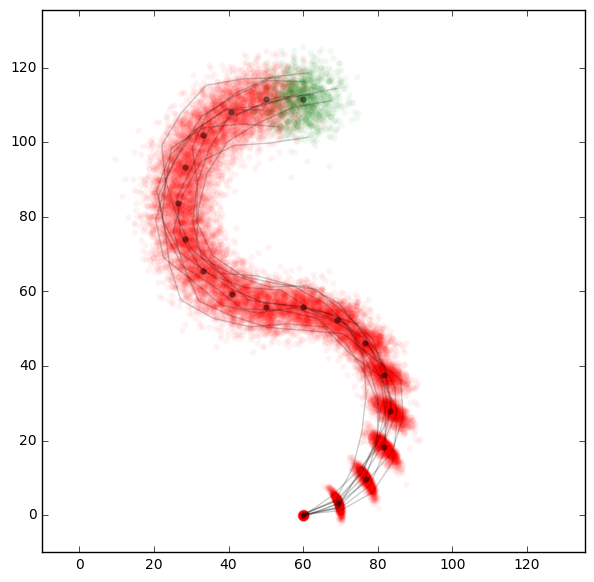

In [5]:
# Create simulated coordinates of the starting point at (0, 0)
# with a standard deviation of 0.3
x = np.random.normal(60, .3, size=(N_SIMULATIONS))
y = np.random.normal(0, .3, size=(N_SIMULATIONS))
N_STEPS = 19
points = np.zeros((N_STEPS, N_SIMULATIONS, 2))
# Define coordinates at step 0
points[0,:,0] = x
points[0,:,1] = y

# Run a simulation of N_STEPS starting at step 1
for i in range(1, N_STEPS):
    # Calculate absolute heading of current step
    heading = 20 * i
    # Turn right after step 9
    if i > 9:
        heading = 360-heading
    # Go one step of distance 10 in the caculated direction.
    dx, dy = go_step(10, 0.1, heading, 10)
    x, y = x+dx, y+dy
    points[i,:,0] = x
    points[i,:,1] = y

plot_points(points)

# Go straight, go left, go straight

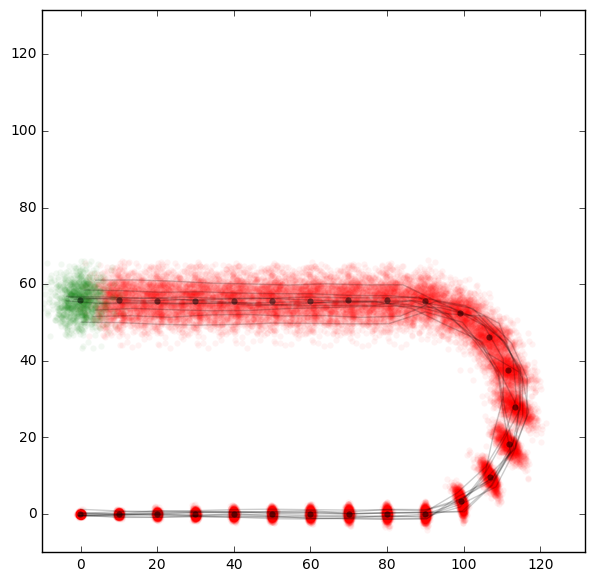

In [6]:
# Create simulated coordinates of the starting point at (0, 0)
# with a standard deviation of 0.3
x = np.random.normal(0, .3, size=(N_SIMULATIONS))
y = np.random.normal(0, .3, size=(N_SIMULATIONS))
N_STEPS = 27
points = np.zeros((N_STEPS, N_SIMULATIONS, 2))
# Define coordinates at step 0
points[0,:,0] = x
points[0,:,1] = y

# Run a simulation of N_STEPS starting at step 1
for i in range(1, N_STEPS):
    # Calculate absolute heading of current step
    heading = 0
    # Low heading standard deviation when going straight
    heading_std = 2
    # Turn right after step 9
    if 9 < i < 19:
        heading = 20 * (i-9)
        # Heading has higher standard deviation in a curve
        heading_std = 10
    elif i >= 19:
        heading = 180
    # Go one step of distance 10 in the caculated direction.
    dx, dy = go_step(10, 0.1, heading, heading_std)
    x, y = x+dx, y+dy
    points[i,:,0] = x
    points[i,:,1] = y

plot_points(points)